## Import modules

In [1]:
from __future__ import division, unicode_literals, print_function
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np, pandas as pd
import os.path, os, sys, json
import math
from math import sqrt
plt.rcParams.update({'font.size': 18, 'figure.figsize': [10.0, 8.0]})
workdir=%pwd
print (workdir)

/Users/mikael/github/SI-Lipase-Structure-Factors/twobody/noswap


## Plot potential of mean force (PMF)

The integration of the PMF for the B2 calculation is done is this cell as well, and B2 values are exported in a text file.

/Users/mikael/github/SI-Lipase-Structure-Factors/twobody/noswap/mc/data


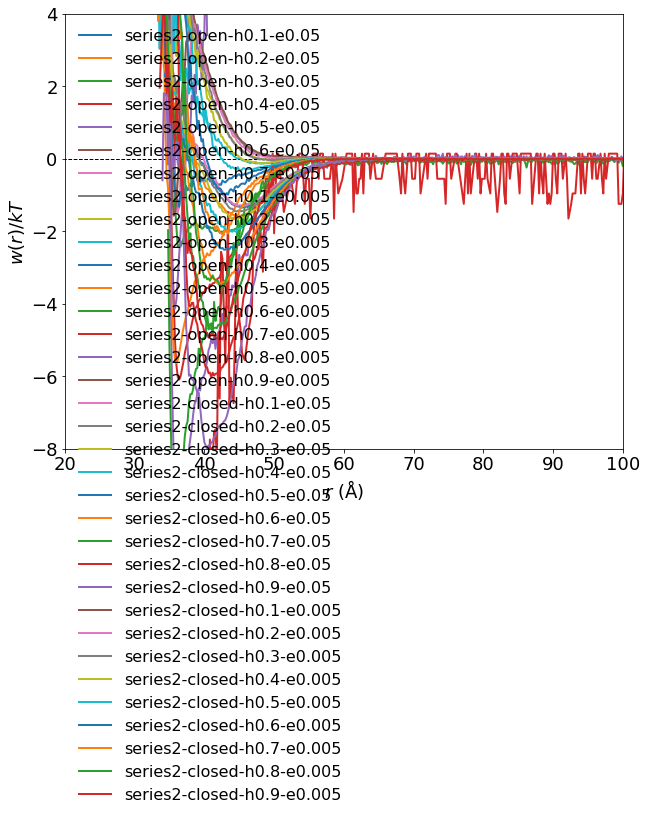

In [2]:
%cd $workdir/mc/data

series = "series2"
structurelist = ["open", "closed"]
factlist = [0.05, 0.005]
hlist = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

outprint1=[]
outprint2=[]
plt.plot((0,100),(0,0),'k--',lw=1.0)

for structure in structurelist:
    for fact in factlist:
        for hstr in hlist:
            %cd -q $workdir/mc/data
            pfx = '{}-{}-h{}-e{}'.format(series, structure, hstr, fact)
            %cd -q $pfx
            rdffile="rdf.dat"
            r, g = np.loadtxt(rdffile, unpack=True)         # Load rdf file
            if (len(r) < 21):                               # Skip if not sampled enough
                continue
            av1=()   
            av2=list(av1)                                      
            for i in np.arange(-20,-1,1):                   # Shift = average of the 20 last values of g 
                av2.append(g[i])
            av3 = sum(av2)/len(av2)  
            g1 = g/av3                                      # Normalized g(r)
            w1 = -np.log(g1)                                # Normalized w(r)
            def b2(x,w):                                    # B2 calculation (here x is the distance)
                inte  = -2*math.pi*(np.exp(-w)- 1)*x**2     # Integration of w(r)
                b2_hc = 2 * math.pi / 3 *(27.8*2)**3        # Hard sphere B2 
                return (np.trapz(inte, x)+b2_hc)/b2_hc      # Normalized B2
            
            plt.plot( r, w1, lw=2.0, label=pfx)
            outprint1.append(hstr) 
            outprint2.append(b2(r,w1))
            %cd -q ../

%cd -q $workdir/mc/data
pfx2 = '{}-{}-e{}'.format(series, structure, fact)
b2file = '../b2-{}.dat'.format(pfx2)  
np.savetxt(b2file, np.transpose((outprint1,outprint2)))      # Saves B2 in .dat file
    
plt.rcParams.update({'font.size': 18, 'figure.figsize': [10.0, 10.0]})
plt.xlim(20,100)
plt.ylim(-8,4)
plt.xlabel("$r$ ($\mathrm{\AA}$)")
plt.ylabel("$w(r)/kT$")
plt.legend(frameon=False,fontsize=16)
%cd -q $workdir/mc/data

## Plot B2 in function of hydrophobic strength

/Users/mikael/github/SI-Lipase-Structure-Factors/twobody/noswap/mc/data


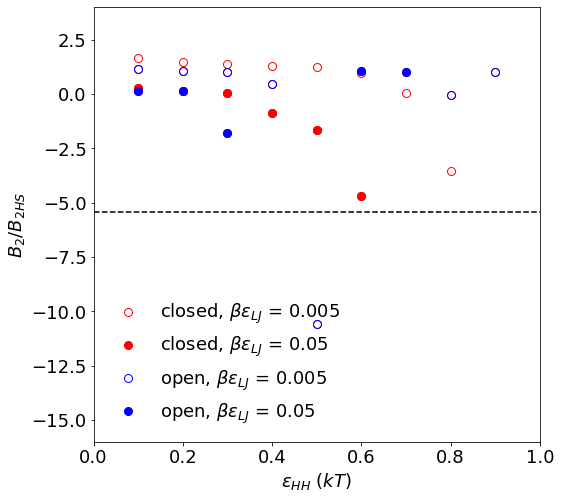

In [3]:
%cd $workdir/mc/data
plt.rcParams.update({'font.size': 18, 'figure.figsize': [8.0, 8.0]})

series = "series2"
structurelist = ["closed", "open"]
factlist = [0.005, 0.05]
for structure in structurelist:
    for fact in factlist:
        pfx2 = '{}-{}-e{}'.format(series, structure, fact)
        h, b = np.loadtxt('../b2-{}.dat'.format(pfx2), unpack=True)
        if structure=="closed":  
            mec='r'      
        if structure=="open":
            mec='b'
        if fact==0.05:
            mfc=mec
        if fact==0.005:
            mfc='None'
        label = r'{}, $\beta \varepsilon_{{LJ}}$ = {}'.format(structure, fact)
        plt.plot(h,b,ls='None', marker='o',ms=8, mfc=mfc, mec=mec, alpha=1.0, label=label)

plt.plot((0.0, 1.0), (-5.44,-5.44), 'k--')
plt.xlabel("$\epsilon_{HH}$ ($kT$)")
plt.ylabel("$B_2/B_{2HS}$")
plt.legend(frameon=False)
plt.xlim(0.0,1.0)
plt.ylim(-16.0, 4.0)

%cd -q $workdir/mc/data

## $B_2$ histogram

This histogram presents the absolute value of the difference between the B2 from simulation and the one from experiments, in function of the conditions.

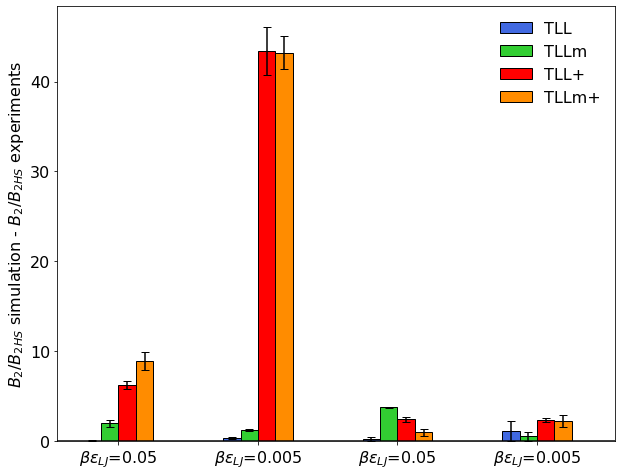

In [4]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 8.0]})

betaeps = r'$\beta\varepsilon_{LJ}}$'

#label = ["Closed, {}=0.05".format(betaeps), r"Closed, {}=0.005".format(betaeps),
#         r"Open, {}=0.05".format(betaeps), r"Open, {}=0.005".format(betaeps)]


label = ["{}=0.05".format(betaeps), r"{}=0.005".format(betaeps),
         r"{}=0.05".format(betaeps), r"{}=0.005".format(betaeps)]

# Position of bars
x1 =[1, 5, 9, 13]
x2 = [1.5, 5.5, 9.5, 13.5]
x3 =[2, 6, 10, 14]
x4 =[2.5, 6.5, 10.5, 14.5]
xmid =[1.75, 5.75, 9.75, 13.75]

# Absolute averaged values of simulated B2 - experimental B2
y1 = [0.07253, 0.3258, 0.2391, 1.1651]     #TLL
y2 = [1.9738, 1.2470, 3.7501, 0.5564]      #TLLm
y3 = [6.2643, 43.3871, 2.4354, 2.3828]     #TLL+           
y4 = [8.9258, 43.1907, 0.9897, 2.2323]     #TLLm+

# Standard deviation of simulated B2 - experimental B2
err1 = [0.0400, 0.1247, 0.1941, 1.0927]    #TLL
err2 = [0.4259, 0.1376, 0.0645, 0.4795]    #TLLm
err3 = [0.4575, 2.6717, 0.3015, 0.2151]    #TLL+           
err4 = [1.0072, 1.8376, 0.3591, 0.6516]    #TLLm+

# Full-scale figure
plt.bar(x1,y1,yerr=err1, capsize=4.0,width=0.5,align='center',color='royalblue', edgecolor='black', label="TLL")
plt.bar(x2,y2,yerr=err2, capsize=4.0,width=0.5,align='center',color='limegreen', edgecolor='black',label="TLLm")
plt.bar(x3,y3,yerr=err3, capsize=4.0,width=0.5,align='center',color='red', edgecolor='black',label="TLL+")
plt.bar(x4,y4,yerr=err4, capsize=4.0,width=0.5,align='center',color='darkorange', edgecolor='black',label="TLLm+")

plt.xticks(xmid,label)
plt.plot((0,16),(0,0),'k-')
plt.xlim(0,16)
plt.legend(loc=0,frameon=False)
plt.ylabel("$B_2/B_{2HS}$ simulation - $B_2/B_{2HS}$ experiments");

## Plot as annotated heatmap

https://matplotlib.org/3.2.2/gallery/images_contours_and_fields/image_annotated_heatmap.html

In [5]:
#from matplotlib import rc
#rc('text', usetex=True)
#rc('text.latex', preamble=r'\usepackage{color}')
#import matplotlib.pyplot as plt

data = np.vstack((y1, y2, y3, y4))
stdev = np.vstack((err1, err2, err3, err4))
interval = stdev / np.sqrt(3)

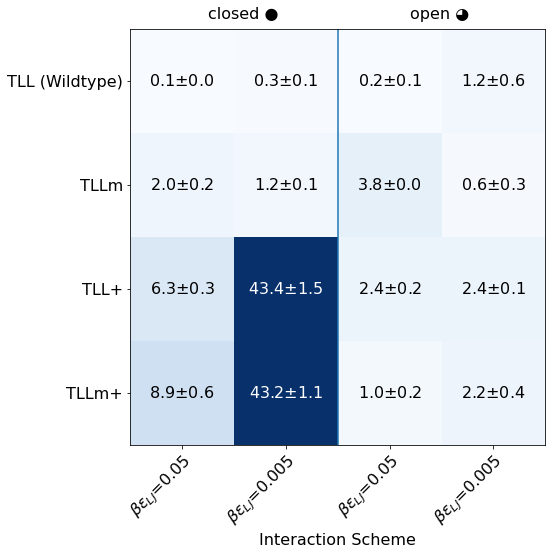

In [6]:
systems = ['TLL (Wildtype)', 'TLLm', 'TLL+', 'TLLm+']
models = label

fig, ax = plt.subplots()
im = ax.imshow(data, cmap=plt.get_cmap("Blues"), interpolation='antialiased')

ax.set_xticks(np.arange(len(models)))
ax.set_yticks(np.arange(len(systems)))
ax.set_xticklabels(models)
ax.set_yticklabels(systems)

ax.set_xlabel('Interaction Scheme')
#ax.set_ylabel('Protein system')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(systems)):
    for j in range(len(systems)):
        color='k'
        if data[i,j] > 20:
            color='w'
        text = ax.text(j, i, '{:.1f}$\pm${:.1f}'.format(data[i, j], interval[i,j]),
                       ha="center", va="center", color=color)
#ax.set_title("open ◕")
ax.text(0.25,-0.6, 'closed ●')
ax.text(2.2,-0.6, 'open ◕')
ax.axvline(1.5)

fig.tight_layout()
plt.savefig('b2-heatmap.pdf', bbox_inches='tight')
plt.show()